In [12]:
import json
import yaml
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import unicodedata
import datasets
from datasets import ClassLabel

In [2]:

# Charger les données depuis entities.json
with open('entities.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


# Charger les règles à partir du fichier tokens.yml
with open('tokens.yml', 'r') as file:
    tokens = yaml.safe_load(file)
    
list_tags=[]
for nom, valeurs in tokens.items():
    list_tags.append(valeurs['start'] )
    
noms_tags = {}
for tag in list_tags:
    nom_tag_p = None
    for nom, valeurs in tokens.items():
        if valeurs['start'] == tag:
            nom_tag_p = nom
    noms_tags.update({tag: nom_tag_p})
   

# Nettoyer le texte en supprimant les caractères spéciaux, les balises, etc.
def clean_text(text):
    #on enleve pas les majuscules car on suppose que c'est une information importante pour tagguer (Noms)
    # Supprimer les caractères spéciaux et les balises saufs celles de list_tags
    clean_text = re.sub(r'[^\w\s' + re.escape(''.join(list_tags)) + ']', '', text)
    return clean_text

# Normaliser le texte en le mettant en minuscules, en supprimant les accents, etc.
def normalize_text(text):
    # Supprimer les accents
    normalized_text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    return normalized_text


# Appliquer les fonctions clean_text et normalize_text à chaque élément de data
data = {key: normalize_text(clean_text(value)) for key, value in data.items()}


# Afficher le nombre d'entrées dans le fichier entities.json
print("Nombre d'entrées dans le fichier entities.json:", len(data))

# Afficher le nombre d'entrées dans le fichier entities.json
print("Nombre de tags :", len(tokens))

data_lines = []
# Afficher quelques exemples de données
#print("\nExemples de données :")
for key, value in data.items():
    liste_elements = value.split("\n")
    data_lines.append(liste_elements)
   # print(key, ":", value[:10])  # Afficher seulement les premiers 100 caractères pour des exemples concis
    
data_lines = [element for sous_liste in data_lines for element in sous_liste]
print("Nombre de lignes dans tous les documents au total :", len(data_lines))


Nombre d'entrées dans le fichier entities.json: 1218
Nombre de tags : 14
Nombre de lignes dans tous les documents au total : 25448


In [3]:



#Construction d'une expression régulière pour rechercher les motifs correspondants à un espace suivi d'un tag
pattern = "|".join(["\s(?={})".format(re.escape(tag)) for tag in list_tags])

     
# Compter le nombre d'occurrences de chaque tag
comptes_tags = {}
for sublist in data_lines:
    print(sublist)
    words =re.split(pattern, sublist)
    for word in words:
        #print(word)
        if (prefix for prefix in list_tags if tag.startswith(word)):
            if len(word)==0:
                break
            if word[0] in comptes_tags:
                comptes_tags[word[0]] += 1
            else:
                comptes_tags[word[0]] = 1


 


ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarcon Ⓚfrancaise
ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarcon ⓀPiemontaise
ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarcon ⓀPiemontaise
ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marie Ⓚfrancaise
ⓄVignat ⒻZelie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrancaise
ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrancaise
ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrancaise
ⓅDesbroper ⒻFrancois Jules Ⓜaumonier du college Ⓐ46 ⒸGarcon Ⓚfrancaise
ⓄApelmeau ⒻTherese Ⓜdomestique Ⓐ49 ⒸFemme mariee Ⓚfrancaise
Ⓟde Chaumont Ⓐ40 ⒸHomme marie Ⓚfrancaise
Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariee Ⓚfrancaise
Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarcon Ⓚfrancaise
Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarcon Ⓚfrancaise
Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarcon Ⓚfrancaise
ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrancaise
ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marie Ⓚfrancaise
ⓄDutertre ⒻAdele Ⓜouvriere Ⓗsa femme Ⓐ45 ⒸFemme mariee Ⓚfrancaise
ⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme marie Ⓚfrancaise
ⓄS

In [4]:

# Initialiser un dictionnaire pour stocker les mots par tag
data_dict = {tag: [] for tag in list_tags}
comptes_dict = {tag: 0 for tag in list_tags}


# Remplir le dictionnaire avec les mots correspondants à chaque tag
for sublist in data_lines:
    #print(sublist)
    
    comptes_dict = {tag: 0 for tag in list_tags}
    for word in re.split(pattern, sublist):
        for tag in list_tags:
            #print(tag, word)
            if word.startswith(tag):
                comptes_dict[tag]=1
                #print("if")
                data_dict[tag].append(word[1:])
      
    for tag in list_tags:
        if comptes_dict[tag]==0:
            data_dict[tag].append("")
                    

# Créer un DataFrame à partir du dictionnaire
df = pd.DataFrame(data_dict)

df.rename(columns=noms_tags, inplace=True)
#df.replace("", np.nan, inplace=True)


In [5]:
# Créer des tableaux vides pour stocker les textes et les tags
texts = []
tags = []

# Parcourir chaque ligne du DataFrame
for _, row in df.iterrows():
    # Initialiser des listes temporaires pour stocker les textes et les tags de la ligne actuelle
    row_texts = []
    row_tags = []
    
    # Parcourir chaque élément de la ligne
    for col, value in row.items():
        # Ignorer les valeurs vides
        if pd.notna(value) and value != '':
            # Ajouter le texte et le tag correspondants aux listes temporaires
            row_texts.append(value)
            row_tags.append(col)
    
    # Ajouter les listes temporaires aux tableaux principaux
    texts.append(row_texts)
    tags.append(row_tags)

# Afficher les tableaux de textes et de tags
print(texts[0], tags[0])

['25', 'Garcon', 'Cyrille', 'francaise', 'menuisier', 'Breton'] ['age', 'civil_status', 'firstname', 'nationality', 'occupation', 'surname']


In [6]:
df

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
0,25,,Garcon,,,Cyrille,,,,francaise,,menuisier,Breton,
1,30,,Garcon,,,Auguste,,,,Piemontaise,,vitrier,,Ferazzi
2,24,,Garcon,,,Pierre,,,,Piemontaise,,vitrier,,Machol
3,48,,Homme marie,,,Alexandre,,,,francaise,,prop re,,Desbois
4,30,,,,,Zelie,sa fe,,,francaise,,prop re,Vignat,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25443,,1887,,,,Annunziata,epouse,idem,,idem,,,BerniLaureti,
25444,,1914,,,,Primo,fils,idem,,idem,,,Berni,
25445,,,,,,,,,,,,,,
25446,,,,,,,,,,,,,,


In [7]:
df.describe()

,age,birth_date,civil_status,education_level,employer,firstname,link,lob,maiden_name,nationality,observation,occupation,surname,surname_household
count,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448,25448
unique,249,159,7,1,1075,2374,889,2890,1,71,308,1960,8025,4105
top,,,,,,Marie,,,,,,,,
freq,9012,18104,14743,25448,22538,2758,4712,16216,25448,12134,24852,9270,6290,19808


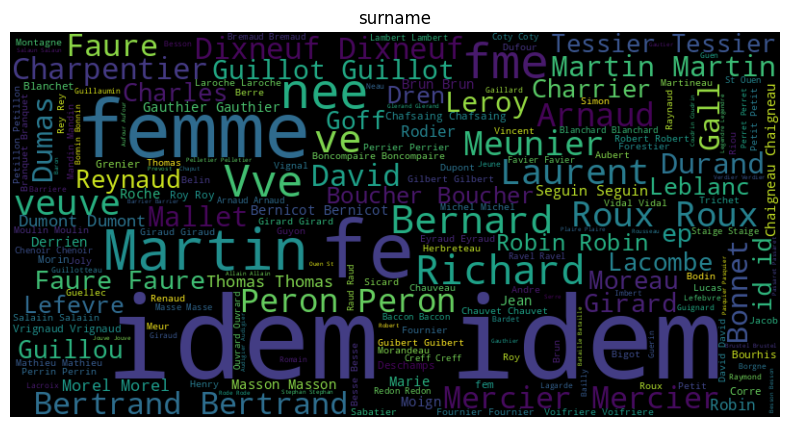

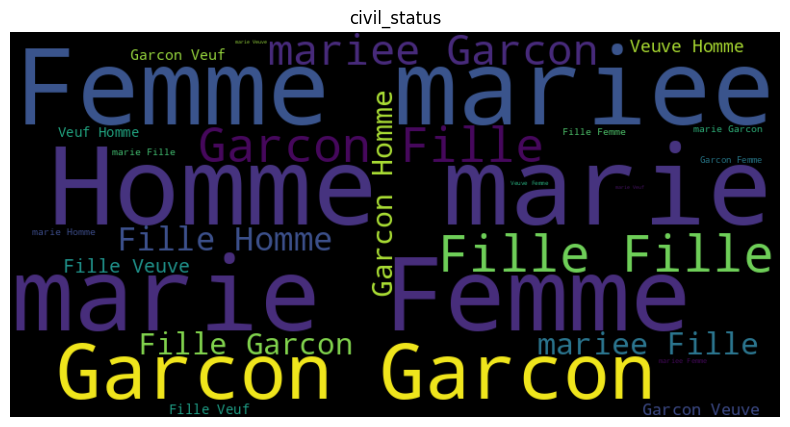

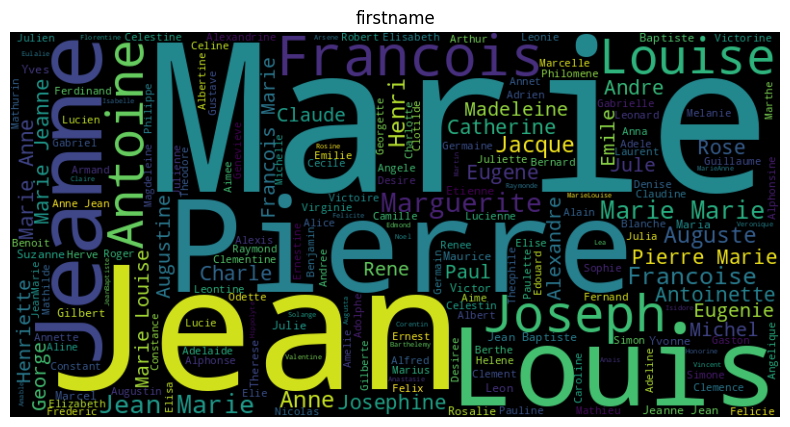

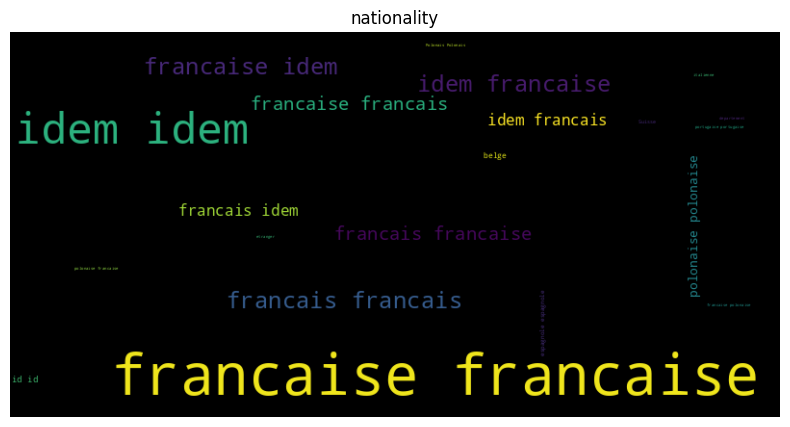

In [8]:
# Display one wordcloud for each of the most frequent classes
STOPWORDS = [x.strip() for x in open('stop_word_fr.txt').readlines()]

# plot a word cloud for each category
for cat in ['surname', 'civil_status',  'firstname','nationality']:
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(df[cat].to_string())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

## Model 

In [9]:
print(texts[0], tags[0], sep='\n')

['25', 'Garcon', 'Cyrille', 'francaise', 'menuisier', 'Breton']
['age', 'civil_status', 'firstname', 'nationality', 'occupation', 'surname']


In [13]:
# Fonction pour séparer les mots contenant un espace suivi d'un caractère en deux nouveaux mots
def separate_words_with_space(texts, tags):
    new_texts = []
    new_tags = []
    
    for text_list, tag_list in zip(texts, tags):
        separated_text_list = []
        separated_tag_list = []
        
        for word, tag in zip(text_list, tag_list):
            # Vérifier si le mot contient un espace suivi d'un caractère
            if ' ' in word:
                parts = word.split(' ')
                for i, part in enumerate(parts):
                    # Ajouter le mot séparé
                    separated_text_list.append(part)
                    
                    # Ajouter le tag correspondant
                    if i == 0:
                        separated_tag_list.append('B-' + tag)
                    else:
                        separated_tag_list.append('I-' + tag)
            else:
                separated_text_list.append(word)
                separated_tag_list.append('B-' + tag)
        
        new_texts.append(separated_text_list)
        new_tags.append(separated_tag_list)
    
    return new_texts, new_tags


desired_label_order = [
    'B-age', 'I-age', 'B-birth_date', 'I-birth_date', 'B-civil_status', 'I-civil_status',
    'B-education_level', 'I-education_level', 'B-employer', 'I-employer', 'B-firstname', 'I-firstname',
    'B-link', 'I-link', 'B-lob', 'I-lob', 'B-maiden_name',
    'I-maiden_name', 'B-nationality', 'I-nationality', 'B-observation', 'I-observation',
    'B-occupation', 'I-occupation','B-surname', 'I-surname',
    'B-surname_household', 'I-surname_household'
]


# Séparer les mots contenant un espace suivi d'un caractère et ajouter les préfixes "B-" et "I-" aux tags
new_texts, new_tags = separate_words_with_space(texts, tags)

tag2id = {tag: id for id, tag in enumerate(desired_label_order)}
id2tag = {id: tag for tag, id in tag2id.items()}
unique_tags_id = [tag2id[tag] for tag in desired_label_order] 

from sklearn.model_selection import train_test_split
train_texts, val_test_texts, train_tags, val_test_tags = train_test_split(new_texts, new_tags, test_size=.4)
test_texts, val_texts, test_tags, val_tags = train_test_split(val_test_texts, val_test_tags, test_size=.5)

from datasets import Dataset, DatasetDict, Sequence

def create_dataset(texts, tags):
    data = {
        "id": [str(i) for i in range(len(texts))],
        "tokens": texts,
        "ner_tags": tags
    }
    return Dataset.from_dict(data).cast_column("ner_tags",Sequence(ClassLabel(names=desired_label_order,num_classes=28)))

train_dataset = create_dataset(train_texts, train_tags)
val_dataset = create_dataset(val_texts, val_tags)
test_dataset = create_dataset(test_texts, test_tags)

datasets = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

print(datasets)

Casting the dataset:   0%|          | 0/15268 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/5090 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/5090 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 15268
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 5090
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 5090
    })
})


In [15]:
label_list = datasets["train"].features[f"ner_tags"].feature.names
print(label_list)

['B-age', 'I-age', 'B-birth_date', 'I-birth_date', 'B-civil_status', 'I-civil_status', 'B-education_level', 'I-education_level', 'B-employer', 'I-employer', 'B-firstname', 'I-firstname', 'B-link', 'I-link', 'B-lob', 'I-lob', 'B-maiden_name', 'I-maiden_name', 'B-nationality', 'I-nationality', 'B-observation', 'I-observation', 'B-occupation', 'I-occupation', 'B-surname', 'I-surname', 'B-surname_household', 'I-surname_household']


In [16]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [17]:
example = datasets["train"][0]
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 '12',
 'joseph',
 'id',
 '##em',
 'francaise',
 'ne',
 '##ant',
 'bare',
 '##ille',
 '##s',
 '[SEP]']

In [18]:
example

{'id': '0',
 'tokens': ['12', 'Joseph', 'idem', 'francaise', 'neant', 'Bareilles'],
 'ner_tags': [0, 10, 12, 18, 22, 24]}

In [19]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [20]:
tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/15268 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/5090 [00:00<?, ? examples/s]

Map:   0%|          | 0/5090 [00:00<?, ? examples/s]

In [21]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [22]:
import evaluate

seqeval = evaluate.load("seqeval")

In [23]:
import numpy as np

labels = [label_list[i] for i in example[f"ner_tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }